In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Create a kaggle folder
!mkdir ~/.kaggle
# Copy json file into the kaggle folder
!cp /content/gdrive/MyDrive/YouTube/kaggle.json ~/.kaggle/
# Give full read & write permission only to the owner
!chmod 600 ~/.kaggle/kaggle.json
# Download the spaceship titanic dataset
!kaggle competitions download -c spaceship-titanic
# Unzip the downloaded dataset
!unzip spaceship-titanic
# Delete the zip file
!rm -rf spaceship-titanic

# Unmount the gdrive
drive.flush_and_unmount()

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 5.07MB/s]
Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Import the pandas module
import pandas as pd

# Read the data
df = pd.read_csv("train.csv") # Train data
# Trace
df.sample(n=5, random_state=42)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
304,0337_02,Mars,False,F/63/S,TRAPPIST-1e,19.0,False,417.0,349.0,634.0,3.0,1057.0,Weros Perle,True
2697,2891_01,Earth,False,G/460/S,TRAPPIST-1e,18.0,False,4.0,904.0,0.0,0.0,1.0,Gleney Ortinericey,False
8424,8998_01,Earth,True,G/1449/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Gerry Englence,False
1672,1771_01,Earth,False,G/291/P,TRAPPIST-1e,35.0,False,0.0,338.0,436.0,NaN,0.0,Antone Cardner,True
8458,9034_02,Europa,True,D/288/P,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Errairk Crakete,True


In [ ]:
def missing_values_table(df: pd.DataFrame) -> pd.DataFrame:
    """
    Takes a Pandas DataFrame as input and returns a new DataFrame with the count
    and percentage of missing values for each feature.

    Parameters:
    -----------
    df : Pandas DataFrame
        The input DataFrame for which to calculate missing values.

    Returns:
    --------
    missing_df : Pandas DataFrame
        The resulting DataFrame with the count and percentage of missing values
        for each feature.
    """

    # Calculate the total number of missing values per feature
    missing_count = df.isnull().sum()

    # Calculate the percentage of missing values per feature
    missing_percentage = (missing_count / len(df)) * 100

    # Create a new DataFrame to store the results
    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    })

    # Sort the DataFrame by the percentage of missing values in descending order
    missing_df = missing_df.sort_values('Missing Percentage', ascending=False)

    return missing_df


# Call the missing_values_table function on the DataFrame
missing_df = missing_values_table(df)

# Print the resulting DataFrame
print(missing_df)

              Missing Count  Missing Percentage
CryoSleep               217            2.496261
ShoppingMall            208            2.392730
VIP                     203            2.335212
HomePlanet              201            2.312205
Name                    200            2.300702
Cabin                   199            2.289198
VRDeck                  188            2.162660
FoodCourt               183            2.105142
Spa                     183            2.105142
Destination             182            2.093639
RoomService             181            2.082135
Age                     179            2.059128
PassengerId               0            0.000000
Transported               0            0.000000


In [ ]:
# Declare the feature types

# Categorical Values
cat = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
# Continuous Values
cont = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
# Target Value(s)
target = ["Transported"]
# Features to drop
f2d = ["PassengerId", "Name"]

In [ ]:
# Import the modules
from typing import List


def fill_missing_values(df: pd.DataFrame, cat_feats: List[str],
                        cont_feats: List[str], target_feats: List[str],
                        drop_feats: List[str], cat_fill_method: str = "mode",
                        cont_fill_method: str = "median") -> pd.DataFrame:
    """
    Fills in missing values in a Pandas DataFrame
    based on the specified feature types and fill methods.

    Parameters:
    -----------
    df : Pandas DataFrame
        The input DataFrame to be processed.

    cat_feats : list of str
        The names of the categorical features in the DataFrame.

    cont_feats : list of str
        The names of the continuous features in the DataFrame.

    target_feats : list of str
        The names of the target features in the DataFrame.

    drop_feats : list of str
        The names of the features to drop from the DataFrame.

    cat_fill_method : str, default='mode'
        The fill method to use for categorical features. This can be one of
        'mode', 'ffill', 'bfill', or a value to use for filling.

    cont_fill_method : str, default='median'
        The fill method to use for continuous features. This can be one of
        'mean', 'median', 'ffill', 'bfill', or a value to use for filling.

    Returns:
    --------
    filled_df : Pandas DataFrame
        The resulting DataFrame with missing values filled in
        based on the specified feature types and fill methods.
    """

    # Make a copy of the input DataFrame to avoid modifying the original
    filled_df = df.copy()

    # Drop the specified features
    filled_df = filled_df.drop(drop_feats, axis=1)

    # Fill missing values for categorical features
    filled_df[cat_feats] = filled_df[cat_feats].fillna(method=cat_fill_method)

    # Fill missing values for continuous features
    filled_df[cont_feats] = filled_df[cont_feats].fillna(method=cont_fill_method)

    # Fill missing values for target features
    filled_df[target_feats] = filled_df[target_feats].fillna(method='ffill')

    return filled_df


# Test the function
filled_df = fill_missing_values(df=df, cat_feats=cat,
                                cont_feats=cont,
                                target_feats=target,
                                drop_feats=f2d)
# Trace the results
missing_values_table(df=filled_df)

ValueError: ignored

In [ ]:
from typing import List


def fill_missing_values(df: pd.DataFrame, cat_feats: List[str], 
                        cont_feats: List[str], target_feats: List[str],
                        drop_feats: List[str], cat_fill_method: str = "mode",
                        cont_fill_method: str = "median") -> pd.DataFrame:
    """
    Fills in missing values in a Pandas DataFrame
    based on the specified feature types and fill methods.

    Parameters:
    -----------
    df : Pandas DataFrame
        The input DataFrame to be processed.

    cat_feats : list of str
        The names of the categorical features in the DataFrame.

    cont_feats : list of str
        The names of the continuous features in the DataFrame.

    target_feats : list of str
        The names of the target features in the DataFrame.

    drop_feats : list of str
        The names of the features to drop from the DataFrame.

    cat_fill_method : str, default='mode'
        The fill method to use for categorical features. This can be one of
        'mode', 'ffill', 'bfill', or a value to use for filling.

    cont_fill_method : str, default='median'
        The fill method to use for continuous features. This can be one of
        'mean', 'median', 'ffill', 'bfill', or a value to use for filling.

    Returns:
    --------
    filled_df : Pandas DataFrame
        The resulting DataFrame with missing values filled in
        based on the specified feature types and fill methods.
    """

    # Make a copy of the input DataFrame to avoid modifying the original
    filled_df = df.copy()

    # Drop the specified features
    filled_df = filled_df.drop(drop_feats, axis=1)

    # Fill missing values for categorical features
    if cat_fill_method == 'mode':
        filled_df[cat_feats] = filled_df[cat_feats].fillna(
            filled_df[cat_feats].mode().iloc[0])
    else:
        filled_df[cat_feats] = filled_df[cat_feats].fillna(cat_fill_method)

    # Fill missing values for continuous features
    if cont_fill_method in ['mean', 'median']:
        filled_df[cont_feats] = filled_df[cont_feats].fillna(
            getattr(filled_df[cont_feats], cont_fill_method)())
    else:
        filled_df[cont_feats] = filled_df[cont_feats].fillna(cont_fill_method)

    # Fill missing values for target features
    filled_df[target_feats] = filled_df[target_feats].fillna(method='ffill')

    return filled_df


# Test the function
filled_df = fill_missing_values(df=df, cat_feats=cat,
                                cont_feats=cont,
                                target_feats=target,
                                drop_feats=f2d)
# Trace the results
missing_values_table(df=filled_df)

,Missing Count,Missing Percentage
HomePlanet,0,0.0
CryoSleep,0,0.0
Cabin,0,0.0
Destination,0,0.0
Age,0,0.0
VIP,0,0.0
RoomService,0,0.0
FoodCourt,0,0.0
ShoppingMall,0,0.0
Spa,0,0.0


In [ ]:
# Import the modules
from typing import Dict


def recast_data_types(df: pd.DataFrame,
                      data_type_dict: Dict[str, str]) -> pd.DataFrame:
    """
    Recasts the data types of the columns in a Pandas DataFrame
    based on a specified dictionary.

    Parameters:
    -----------
    df : Pandas DataFrame
        The input DataFrame to be processed.

    data_type_dict : dict
        A dictionary that maps column names to their new data types.
        The keys are the column names, and the values are the new data types
        (e.g., 'int', 'float', 'bool', 'str').

    Returns:
    --------
    recast_df : Pandas DataFrame
        The resulting DataFrame with the specified data types for the columns.
    """

    # Make a copy of the input DataFrame to avoid modifying the original
    recast_df = df.copy()

    # Loop over the columns in the data_type_dict and recast their data types
    for col_name, data_type in data_type_dict.items():
        recast_df[col_name] = recast_df[col_name].astype(data_type)

    return recast_df


# Declare the dtypes
data_type_dict = {c: "uint16" for c in cont}
# Test the function
recast_df = recast_data_types(filled_df, data_type_dict)
# Trace the results
print(recast_df.dtypes)

HomePlanet      object
CryoSleep         bool
Cabin           object
Destination     object
Age             uint16
VIP               bool
RoomService     uint16
FoodCourt       uint16
ShoppingMall    uint16
Spa             uint16
VRDeck          uint16
Transported       bool
dtype: object


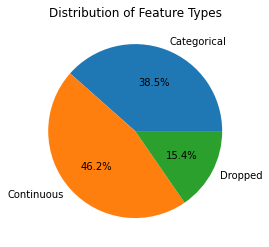

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature types
cat = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
cont = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
target = ["Transported"]
f2d = ["PassengerId", "Name"]

# Get the count of feature types
cat_count = len(cat)
cont_count = len(cont)
f2d_count = len(f2d)

# Create a dictionary to store the counts
feature_type_counts = {
    "Categorical": cat_count,
    "Continuous": cont_count, 
    "Dropped": f2d_count
    }

# Plot the pie chart
fig, ax = plt.subplots()
sns.set_palette("bright")
ax.pie(feature_type_counts.values(),
       labels=feature_type_counts.keys(),
       autopct='%1.1f%%')
ax.set_title("Distribution of Feature Types")
# Show the plot
plt.show()

In [ ]:
# Trace the number of unique variables in the categorical features
# Define a list to store the categorical variables with less than 6 unique values
corr_cat = []

# Loop through each categorical variable and
# check if it has less than 6 unique values
for var in cat:
    if df[var].nunique() < 6:
        corr_cat.append(var)

# Print the list of categorical variables with less than 6 unique values
print(corr_cat)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


In [ ]:
# Convert categorical variables to one-hot encoding
cat_df = pd.get_dummies(recast_df[corr_cat])
# Combine the one-hot encoded categorical variables
# and the continuous variables into one dataframe
corr_df = pd.concat([cat_df, recast_df[[*cont, *target]]], axis=1)
# Trace
print(corr_df.shape)

# Compute the correlation matrix
corr_matrix = corr_df.corr()

(8693, 15)


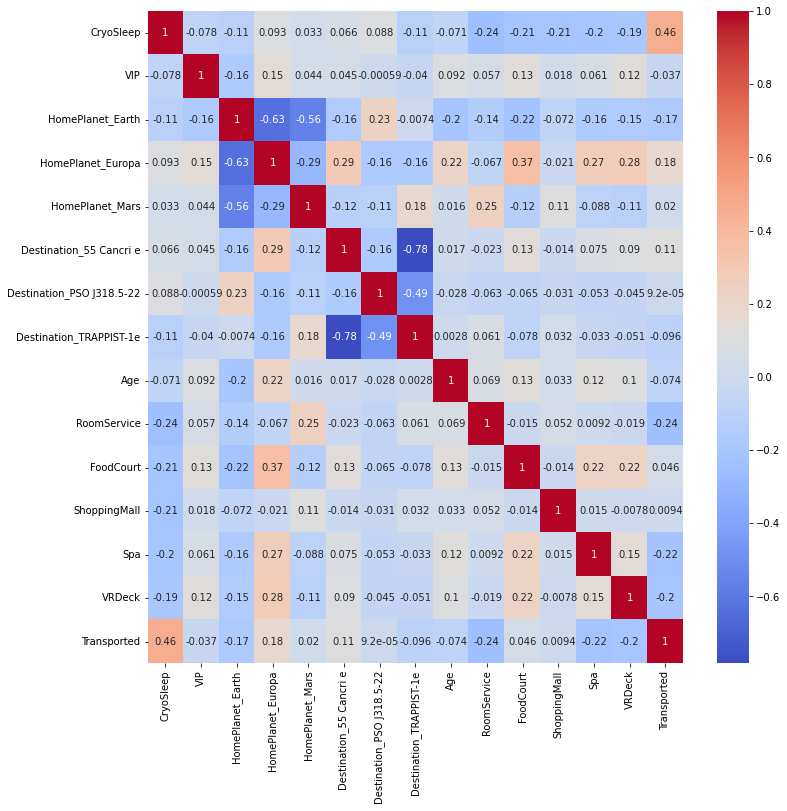

In [ ]:
# Figure size
f, ax = plt.subplots(figsize=(12, 12))
# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

AttributeError: ignored

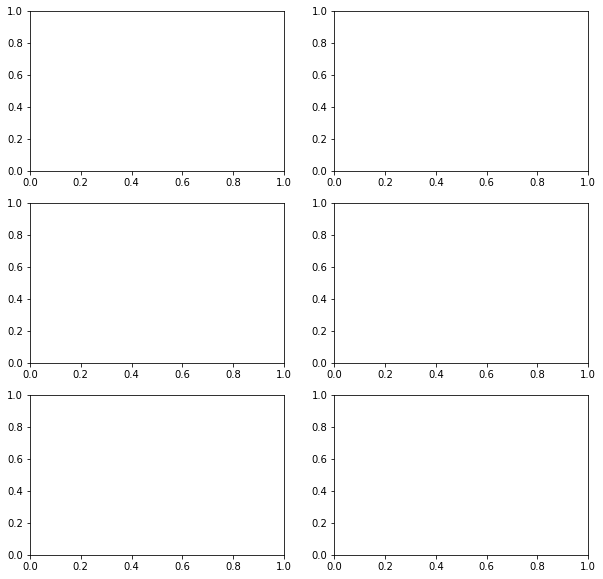

In [ ]:
# Create a figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Flatten the subplots into a 1D array
axs = axs.flatten()

# Loop through each variable and create a QQ plot in the corresponding subplot
for i, var in enumerate(cont):
    sns.qqplot(df[var], ax=axs[i])
    axs[i].set_title(var)

# Adjust the layout of the subplots
fig.tight_layout()

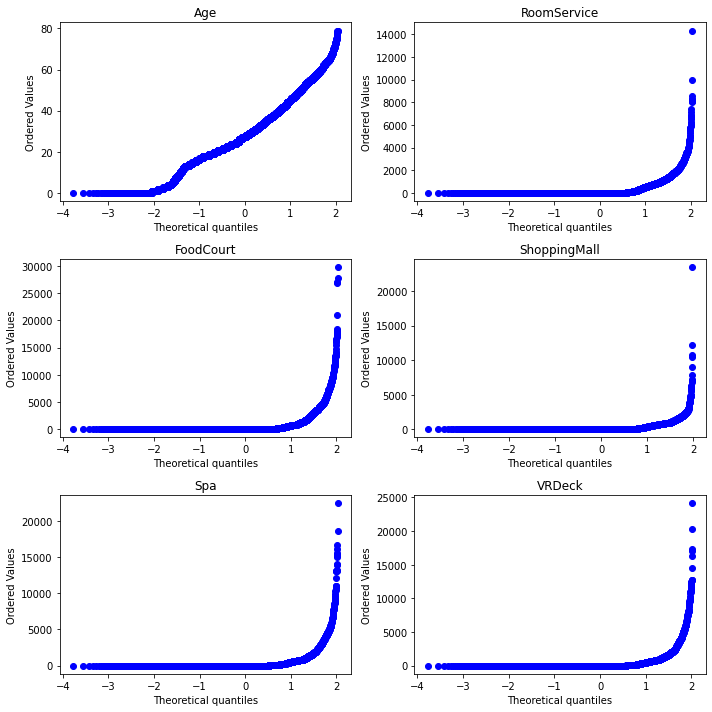

In [ ]:
# Import the modules
import scipy.stats as stats

# Create a figure with a 3x2 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# Flatten the subplots into a 1D array
axs = axs.flatten()

# Loop through each variable andcreate a QQ plot in the corresponding subplot
for i, var in enumerate(cont):
    # Create the QQ plot
    stats.probplot(df[var], dist="norm", plot=axs[i])
    axs[i].set_title(var)

# Adjust the layout of the subplots
fig.tight_layout()

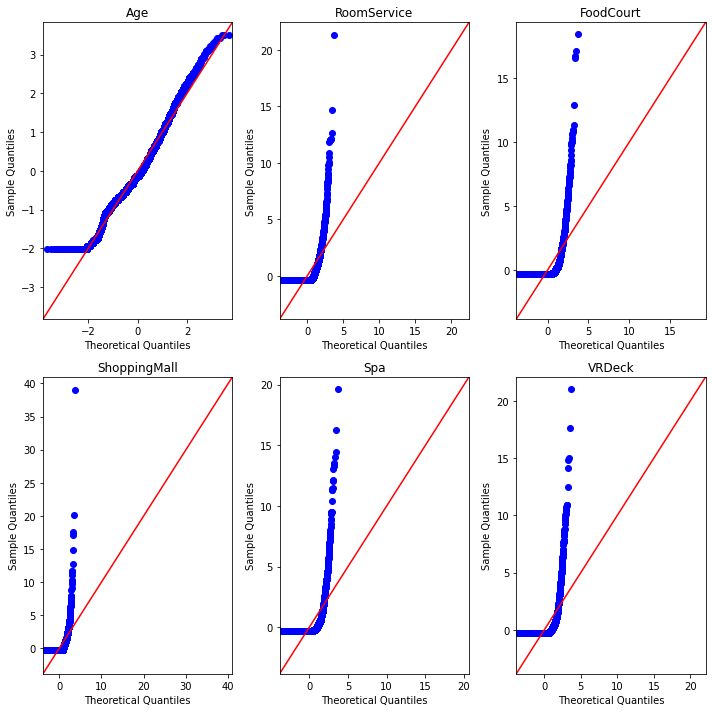

In [ ]:
# Import the modules
from scipy.stats import norm
from statsmodels.api import ProbPlot

# Create a figure with a 2x3 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Flatten the subplots into a 1D array
axs = axs.flatten()

# Loop through each variable and create a QQ plot in the corresponding subplot
for i, var in enumerate(cont):
    # Declare a Probability Plot object
    pplot = ProbPlot(data=recast_df[var], dist=norm, fit=True)
    # Create the QQ plot
    pplot.qqplot(line="45", ax=axs[i])
    axs[i].set_title(var)

# Adjust the layout of the subplots
fig.tight_layout()

In [ ]:
def split_cabin(df: pd.DataFrame) -> pd.DataFrame:
    """
    Splits the "Cabin" feature into three new features called "CabinDeck", "CabinNum",
    and "CabinSide" and changes the data type of "CabinNum" feature to "uint16".

    Args:
        df: The pandas DataFrame containing the "Cabin" feature.

    Returns:
        The pandas DataFrame with the new "CabinDeck", "CabinNum", and "CabinSide" features.
    """
    # Create new columns for each part of the "Cabin" feature
    df[['CabinDeck', 'CabinNum', 'CabinSide']] = df['Cabin'].str.split('/', expand=True)

    # Change the data type of the "CabinNum" feature to uint16
    df['CabinNum'] = df['CabinNum'].astype('uint16')

    # Return the updated DataFrame
    return df


# Test the function
new_df = split_cabin(df=recast_df)
# Trace the results
new_df.sample(n=5, random_state=43)[["Cabin", "CabinDeck", "CabinNum", "CabinSide"]]

,Cabin,CabinDeck,CabinNum,CabinSide
7992,E/545/P,E,545,P
5389,F/1194/P,F,1194,P
1676,G/278/S,G,278,S
2974,F/606/S,F,606,S
7860,G/1368/P,G,1368,P


In [ ]:
# Trace the dtypes
new_df[["Cabin", "CabinDeck", "CabinNum", "CabinSide"]].dtypes

Cabin        object
CabinDeck    object
CabinNum     uint16
CabinSide    object
dtype: object

- Scatter plots: Used to show the relationship between two continuous variables.

- Line charts: Used to show trends and changes over time.

- Bar charts: Used to compare the values of different categories.

- Histograms: Used to show the distribution of a single variable.

- Heatmaps: Used to show the relationship between two variables in a grid format.

- Box plots: Used to show the distribution of a variable and identify outliers.

- Pie charts: Used to show the proportion of values within a single category.

- Area charts: Used to show the relationship between two or more variables and the contribution of each variable to the total.

- Violin plots: Used to show the distribution of a variable and the density of the data.

- Network graphs: Used to show the relationship between multiple variables or entities.